<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#set-directory-here" data-toc-modified-id="set-directory-here-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>set directory here</a></span></li><li><span><a href="#set-file-name-here" data-toc-modified-id="set-file-name-here-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>set file name here</a></span></li><li><span><a href="#use-code-here" data-toc-modified-id="use-code-here-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>use code here</a></span><ul class="toc-item"><li><span><a href="#vertical-cross-cuts-as-a-function-of-wl" data-toc-modified-id="vertical-cross-cuts-as-a-function-of-wl-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>vertical cross cuts as a function of wl</a></span></li></ul></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 5)
plt.rcParams.update({'errorbar.capsize': 3})
plt.rcParams['xtick.labelsize']= 13
plt.rcParams['ytick.labelsize']= 13
plt.rcParams.update({'axes.labelsize': 16})

In [3]:
%set_env CRDS_PATH $HOME/crds_cache
%set_env CRDS_SERVER_URL https://jwst-crds.stsci.edu

env: CRDS_PATH=$HOME/crds_cache
env: CRDS_SERVER_URL=https://jwst-crds.stsci.edu


In [4]:
from astropy.io import fits
import os

In [15]:
from jwst import datamodels


In [124]:
def explore_crosscuts(dat_2d,row_range=[0,-1],wl_range=[0,6]):
    #horizontal
    l=len(dat_2d.data)
    plt.figure(figsize=(15,3))
    for i,item in enumerate(dat_2d.data):
        cross_cut_horiz=np.sum(item[row_range[0]:row_range[1]],axis=0)
        plt.plot(cross_cut_horiz,color=(0,i*1./l,i*1./l))
    plt.figure(figsize=(15,3))
    w=np.nanmean(dat_2d.wavelength,axis=0)
    #print(w)
    for i,item in enumerate(dat_2d.data):
        loc=((w<=wl_range[1]) & (w>wl_range[0]))
        cross_cut_horiz=np.sum(item[:,loc],axis=1)
        plt.plot(cross_cut_horiz,color=(0,i*1./l,i*1./l))    
    cross_cut_vert=np.sum(dat_2d.data[0],axis=1)
    print(cross_cut_horiz.shape)

In [157]:
def explore_verticalcrosscuts(dat_2d,wl_bins=5,errorbars=False):
    #horizontal
    plt.figure(figsize=(5,12))
    l=len(dat_2d.data)
    w=np.nanmean(dat_2d.wavelength,axis=0)
    #print(w)
    wmin=np.min(w)
    wmax=np.max(w)
    wrange=wmax-wmin
    wbin_range=wrange/wl_bins
    #print(wbin_range,wrange)
    for b in range(wl_bins):
        plt.subplot(wl_bins,1,b+1)
        w1=(wmin+(b+1)*wbin_range)
        w0=(wmin+(b)*wbin_range)
        loc=((w<=(wmin+(b+1)*wbin_range)) & (w>=(wmin+(b)*wbin_range)))
        plt.title(str(round(w0,2))+' to '+str(round(w1,2)))
        if (b+1)<wl_bins:
            plt.xticks([])
        for i,item in enumerate(dat_2d.data):

            cross_cut_horiz=np.sum(item[:,loc],axis=1)
            
            plt.plot(cross_cut_horiz,color=(0,i*1./l,i*1./l))  
            if errorbars:
                err2d=dat_2d.err[i]
                cross_cut_err=np.sum(err2d[:,loc],axis=1)
                #print(cross_cut_err.shape,cross_cut_horiz.shape,err2d.shape)
                plt.errorbar(x=np.arange(len(cross_cut_err)),y=cross_cut_horiz,yerr=cross_cut_err,color=(0,i*1./l,i*1./l))


# set directory here

In [134]:
os.chdir('../../Documents/datachallenge/NIRSpec/Tiny/')

FileNotFoundError: [Errno 2] No such file or directory: '../../Documents/datachallenge/NIRSpec/Tiny/'

In [135]:
files=os.listdir()
files

['jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_rateints.fits',
 'jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_calints.fits',
 '.DS_Store',
 'mine_extract1dstep.fits',
 'ancil',
 '$HOME',
 'Stage5',
 'Stage4',
 'jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_x1dints.fits',
 'Stage3']

# set file name here

In [136]:
f='jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_calints.fits'

model=datamodels.open("jwdata0010010_11010_0001_NRS1_uncal_updatedHDR_TINY_injected_calints.fits'")

In [137]:
cal_image = datamodels.SpecModel(f)

# use code here

## vertical cross cuts as a function of wl

(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,) (23, 432)
(23,) (23,

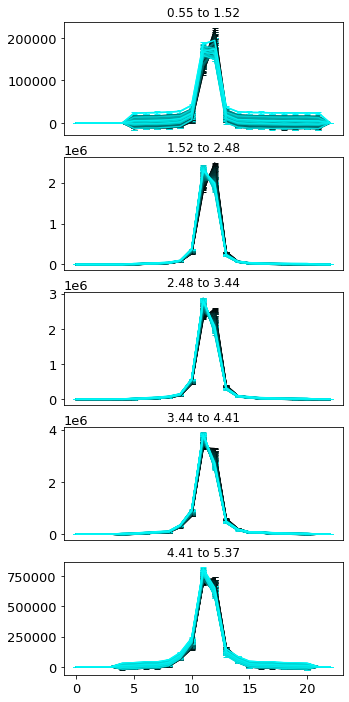

In [156]:
explore_verticalcrosscuts(cal_image,errorbars=True)

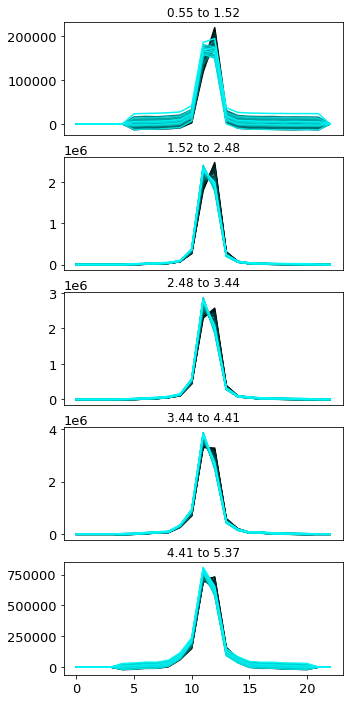

In [138]:
explore_verticalcrosscuts(cal_image)

(23,)


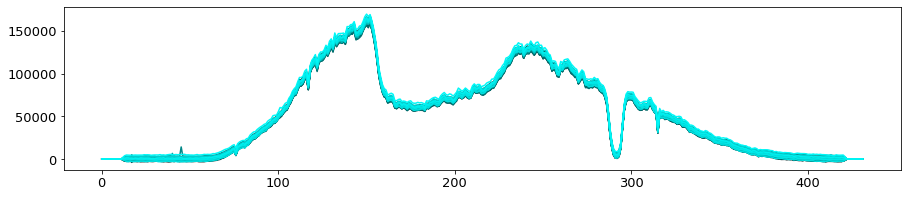

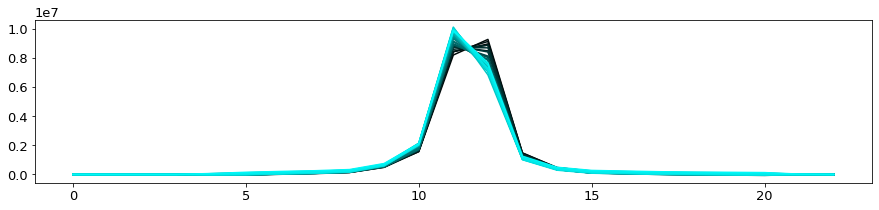

In [125]:
explore_crosscuts(cal_image)

(23,)


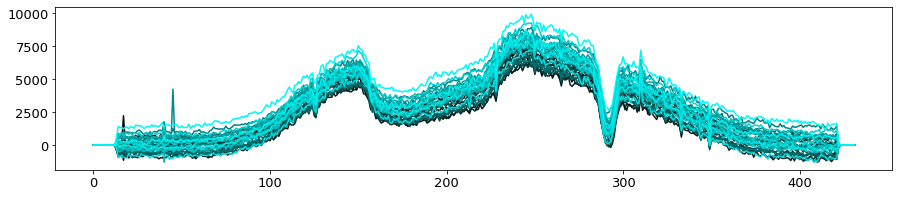

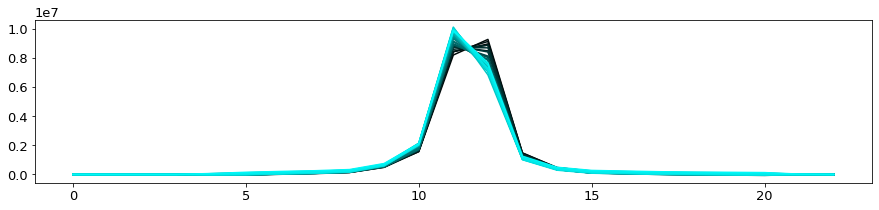

In [126]:
explore_crosscuts(cal_image,row_range=[3,10])

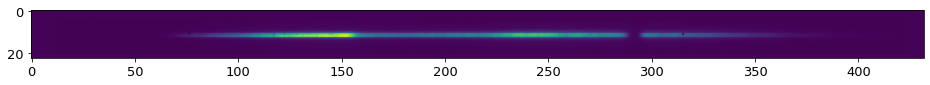

In [12]:
plt.imshow(cal_image.data[0])

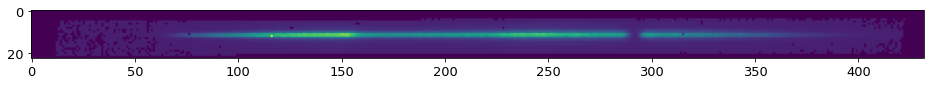

In [130]:
plt.imshow(cal_image.err[0])